In [ ]:
import numpy as np
import pandas as pd
import json
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### Generate synthetic training data

In [ ]:
num_samples = 500

In [ ]:
plot_widths = np.random.randint(30, 60, num_samples)
plot_depths = np.random.randint(30, 60, num_samples)
num_rooms = np.random.randint(3, 7, num_samples)

In [ ]:
def split_plot(x, y, width, height, num_rooms):
    if num_rooms == 1:
        if width / height > 2:
              width = height * 2
        elif height / width > 2:
            height = width * 2
        return [(x, y, width, height)]

    split_vertically = np.random.choice([True, False])

    if split_vertically:
        split_min = max(width // 3, width // 2 - 5)
        split_max = min(2 * width // 3, width // 2 + 5)
        split_line = np.random.randint(split_min, split_max)
        left_rooms = num_rooms // 2
        right_rooms = num_rooms - left_rooms
        return split_plot(x, y, split_line, height, left_rooms) + split_plot(x + split_line, y, width - split_line, height, right_rooms)
    else:
        split_min = max(height // 3, height // 2 - 5)
        split_max = min(2 * height // 3, height // 2 + 5)
        split_line = np.random.randint(split_min, split_max)
        top_rooms = num_rooms // 2
        bottom_rooms = num_rooms - top_rooms
        return split_plot(x, y, width, split_line, top_rooms) + split_plot(x, y + split_line, width, height - split_line, bottom_rooms)

In [ ]:
room_data = [split_plot(0, 0, plot_widths[i], plot_depths[i], num_rooms[i]) for i in range(num_samples)]

### Building and training the model

In [ ]:
X = np.column_stack((plot_widths, plot_depths, num_rooms))
max_length = max(len(r) * 4 for r in room_data)
y_padded = np.array([
    np.pad(np.array(r).flatten(), (0, max_length - len(np.array(r).flatten())), mode='constant')
    for r in room_data
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_padded, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

### Evaluate Model

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 5.92


### Helper Functions

In [ ]:
def generate_layout(plot_width, plot_depth, num_rooms):
    pred = model.predict([[plot_width, plot_depth, num_rooms]])[0]
    pred = pred.reshape(-1, 4)[:num_rooms]
    room_data = []
    for i, (x, y, w, h) in enumerate(pred):
        room_data.append({"id": i+1, "x": int(x), "y": int(y), "width": int(w), "height": int(h)})
    return room_data

In [ ]:
def plot_layout(layout, plot_width, plot_depth):
    fig, ax = plt.subplots()
    ax.set_xlim(0, plot_width)
    ax.set_ylim(plot_depth, 0)

    for room in layout:
        rect = plt.Rectangle((room["x"], room["y"]), room["width"], room["height"], fill=True, edgecolor="black", linewidth=2)
        ax.add_patch(rect)
        ax.text(room["x"] + room["width"]/2, room["y"] + room["height"]/2, str(room["id"]), ha='center', va='center')

    ax.set_title("Generated Room Layout")
    plt.gca().invert_yaxis()
    plt.show()

### Execution

In [ ]:
plot_width, plot_depth, num_rooms = 50, 40, 5

In [ ]:
layout = generate_layout(plot_width, plot_depth, num_rooms)

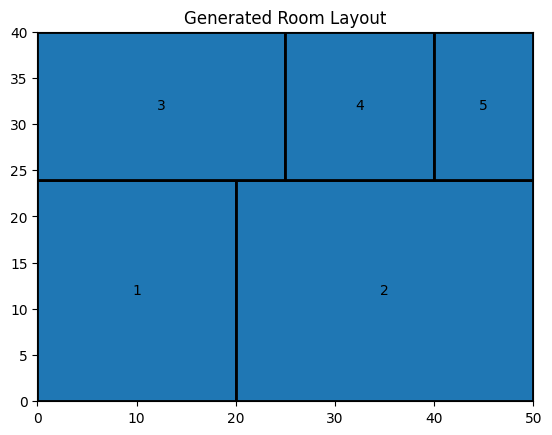

In [ ]:
plot_layout(layout, plot_width, plot_depth)

In [ ]:
import json

In [ ]:
import json
with open('output.json', 'w') as f:
    json.dump(layout, f)